In [4]:
import os
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import altair as alt
from scipy import sparse 
from scipy.sparse import csgraph

alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [7]:
# Read seeds
path = "/home/vast/MC1/data"

seed_1_file = os.path.join(path, 'Q2-Seed1.csv')
seed_2_file = os.path.join(path, 'Q2-Seed2.csv')
seed_3_file = os.path.join(path, 'Q2-Seed3.csv')

seed_1 = pd.read_csv(seed_1_file)
seed_2 = pd.read_csv(seed_2_file)
seed_3 = pd.read_csv(seed_3_file)



In [8]:
display(seed_1)
display(seed_2)
display(seed_3)

Source  eType  Target       Time    Weight  SourceLocation  TargetLocation  \
0  600971      4  579269 -685755382  0.166667             NaN             NaN   

   SourceLatitude  SourceLongitude  TargetLatitude  TargetLongitude  
0             NaN              NaN             NaN              NaN

Source  eType  Target       Time    Weight  SourceLocation  TargetLocation  \
0  538771      4  473043 -623491200  0.090909             NaN             NaN   

   SourceLatitude  SourceLongitude  TargetLatitude  TargetLongitude  
0             NaN              NaN             NaN              NaN

Source  eType  Target     Time  Weight  SourceLocation  TargetLocation  \
0  574136      2  657187  1991785     633             NaN             NaN   

   SourceLatitude  SourceLongitude  TargetLatitude  TargetLongitude  
0             NaN              NaN             NaN              NaN

In [12]:
seed_1_id = seed_1.Source.values[0]
seed_2_id = seed_2.Source.values[0]
seed_3_id = seed_3.Source.values[0]

In [1]:
import get_files

channel_mail = 0
nodes_unique_0 = get_files.get_communication_unique(channel=channel_mail)
coo_matrix_0 = get_files.get_communication_matrix(channel=channel_mail)

Loading already computed.
Loading already computed matrix for channel 0.


In [5]:
mat_csr_0 = coo_matrix_0.tocsr() 
nc = csgraph.connected_components(csgraph=mat_csr, directed=True, return_labels=False)
print(f'connected components {nc}')

connected components 1


In [33]:
i_seed1_c0 = np.where(nodes_unique_0 == seed_1_id)[0]
i_seed2_c0 = np.where(nodes_unique_0 == seed_2_id)[0]
i_seed3_c0 = np.where(nodes_unique_0 == seed_3_id)[0]

In [24]:
channel_phone = 1
nodes_unique_1 = get_files.get_communication_unique(channel=channel_phone)

Loading already computed.


In [34]:
i_seed1_c1 = np.where(nodes_unique_1 == seed_1_id)[0]
i_seed2_c1 = np.where(nodes_unique_1 == seed_2_id)[0]
i_seed3_c1 = np.where(nodes_unique_1 == seed_3_id)[0]

In [36]:
i_seed1_c1

array([71771])

In [37]:
seller = 595104
buyer = 570284

i_buyer_c0 = np.where(nodes_unique_0 == buyer)[0]
i_buyer_c1 = np.where(nodes_unique_1 == buyer)[0]

i_seller_c0 = np.where(nodes_unique_0 == seller)[0]
i_seller_c1 = np.where(nodes_unique_1 == seller)[0]

In [42]:
i_seller_c1

array([68813])

In [43]:
mat_csr_0 

In [47]:
from scipy.sparse.csgraph import shortest_path

dist_matrix, predecessors = shortest_path(csgraph=mat_csr_0, directed=True, indices=[i_seed1_c0[0], i_seed3_c0[0]], return_predecessors=True)



In [56]:
print(f'distance from seed1 to buyer {dist_matrix[0][i_buyer_c0]}')
print(f'predecessor from seed1 to buyer {predecessors[0][i_buyer_c0]}')

print(f'distance from seed1 to seller {dist_matrix[0][i_seller_c0]}')
print(f'predecessor from seed1 to buyer {predecessors[0][i_seller_c0]}')

distance from seed1 to buyer [2.]
predecessor from seed1 to buyer [66782]
distance from seed1 to seller [2.]
predecessor from seed1 to buyer [57113]


In [73]:
np.sum(dist_matrix[0]<2)

978

In [58]:
mathced_nodes = [584811,477769,572500,500192,480268,516694,615605,480375,476124,638752,545850,570284,643925649553,463126,604223,573206,594766,561312,546999,645393,634283,598220,479204,510483,655636,636990,581406,519424,558277,562598,492937,513182,551810,617074,593266]



In [78]:
index_matched_nodes = []
for mn in mathced_nodes:
    index_matched_nodes.append(np.where(nodes_unique_0 == mn)[0][0])
    
    index_matched_nodes = np.array(index_matched_nodes)

In [76]:
mat_csr_0

<100000x100000 sparse matrix of type '<class 'numpy.int32'>'
	with 48263249 stored elements in Compressed Sparse Row format>

In [86]:
import matplotlib.pyplot as plt
import networkx as nx

G0 = nx.from_scipy_sparse_matrix(mat_csr_0[index_matched_nodes,:][:,index_matched_nodes])

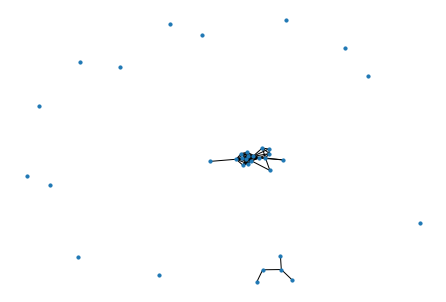

In [93]:
nx.draw(G0, node_size=10)

In [64]:
for imn in index_matched_nodes:
    print(f'distance from seed1 to {imn} {dist_matrix[0][imn[0]]}')
#     print(f'predecessor from seed1 to buyer {predecessors[0][imn[0]]}')

distance from seed1 to 63731 2.0
distance from seed1 to 10425 2.0
distance from seed1 to 57601 2.0
distance from seed1 to 21531 2.0
distance from seed1 to 11672 2.0
distance from seed1 to 29771 2.0
distance from seed1 to 79022 2.0
distance from seed1 to 11725 2.0
distance from seed1 to 9590 2.0
distance from seed1 to 90535 2.0
distance from seed1 to 44351 2.0
distance from seed1 to 56511 2.0
distance from seed1 to 93169 2.0
distance from seed1 to 95956 2.0
distance from seed1 to 3165 2.0
distance from seed1 to 73386 2.0
distance from seed1 to 57960 2.0
distance from seed1 to 68632 2.0
distance from seed1 to 52018 2.0
distance from seed1 to 44919 2.0
distance from seed1 to 93893 2.0
distance from seed1 to 88305 2.0
distance from seed1 to 70392 2.0
distance from seed1 to 11125 2.0
distance from seed1 to 26624 2.0
distance from seed1 to 98984 2.0
distance from seed1 to 89676 2.0
distance from seed1 to 62024 2.0
distance from seed1 to 31114 2.0
distance from seed1 to 50544 2.0
distance fro

In [65]:
for imn in index_matched_nodes:
    print(f'distance from seed3 to {imn} {dist_matrix[1][imn[0]]}')
#     print(f'predecessor from seed1 to buyer {predecessors[0][imn[0]]}')

distance from seed3 to 63731 2.0
distance from seed3 to 10425 2.0
distance from seed3 to 57601 2.0
distance from seed3 to 21531 3.0
distance from seed3 to 11672 2.0
distance from seed3 to 29771 2.0
distance from seed3 to 79022 2.0
distance from seed3 to 11725 2.0
distance from seed3 to 9590 2.0
distance from seed3 to 90535 2.0
distance from seed3 to 44351 2.0
distance from seed3 to 56511 2.0
distance from seed3 to 93169 2.0
distance from seed3 to 95956 2.0
distance from seed3 to 3165 2.0
distance from seed3 to 73386 2.0
distance from seed3 to 57960 2.0
distance from seed3 to 68632 2.0
distance from seed3 to 52018 2.0
distance from seed3 to 44919 2.0
distance from seed3 to 93893 2.0
distance from seed3 to 88305 2.0
distance from seed3 to 70392 2.0
distance from seed3 to 11125 2.0
distance from seed3 to 26624 2.0
distance from seed3 to 98984 2.0
distance from seed3 to 89676 2.0
distance from seed3 to 62024 2.0
distance from seed3 to 31114 2.0
distance from seed3 to 50544 2.0
distance fro